<a href="https://colab.research.google.com/github/shashwat12jha/Machine-Learning/blob/main/RegressionANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [7]:
from google.colab import files
files.upload()


Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


{'Admission_Predict_Ver1.1.csv': b'Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR ,CGPA,Research,Chance of Admit \r\n1,337,118,4,4.5,4.5,9.65,1,0.92\r\n2,324,107,4,4,4.5,8.87,1,0.76\r\n3,316,104,3,3,3.5,8,1,0.72\r\n4,322,110,3,3.5,2.5,8.67,1,0.8\r\n5,314,103,2,2,3,8.21,0,0.65\r\n6,330,115,5,4.5,3,9.34,1,0.9\r\n7,321,109,3,3,4,8.2,1,0.75\r\n8,308,101,2,3,4,7.9,0,0.68\r\n9,302,102,1,2,1.5,8,0,0.5\r\n10,323,108,3,3.5,3,8.6,0,0.45\r\n11,325,106,3,3.5,4,8.4,1,0.52\r\n12,327,111,4,4,4.5,9,1,0.84\r\n13,328,112,4,4,4.5,9.1,1,0.78\r\n14,307,109,3,4,3,8,1,0.62\r\n15,311,104,3,3.5,2,8.2,1,0.61\r\n16,314,105,3,3.5,2.5,8.3,0,0.54\r\n17,317,107,3,4,3,8.7,0,0.66\r\n18,319,106,3,4,3,8,1,0.65\r\n19,318,110,3,4,3,8.8,0,0.63\r\n20,303,102,3,3.5,3,8.5,0,0.62\r\n21,312,107,3,3,2,7.9,1,0.64\r\n22,325,114,4,3,2,8.4,0,0.7\r\n23,328,116,5,5,5,9.5,1,0.94\r\n24,334,119,5,5,4.5,9.7,1,0.95\r\n25,336,119,5,4,3.5,9.8,1,0.97\r\n26,340,120,5,4.5,4.5,9.6,1,0.94\r\n27,322,109,5,4.5,3.5,8.8,0,0.76\r\n28,298,9

In [8]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")


In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
df.drop(columns=["Serial No."],inplace = True)

In [16]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [17]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [21]:
X_train_scaled


array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [22]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [31]:
model = Sequential()
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss="mean_squared_error",optimizer="Adam")

In [34]:
history = model.fit(X_train_scaled,y_train,epochs=67,validation_split=0.2)

Epoch 1/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0576 - val_loss: 0.0545
Epoch 2/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0431 - val_loss: 0.0475
Epoch 3/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0376 - val_loss: 0.0412
Epoch 4/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0326 - val_loss: 0.0361
Epoch 5/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0248 - val_loss: 0.0318
Epoch 6/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0222 - val_loss: 0.0282
Epoch 7/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0199 - val_loss: 0.0250
Epoch 8/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0181 - val_loss: 0.0223
Epoch 9/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0172 - val_loss: 0.0199
Epoch 10/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - val_loss: 0.0176
Epoch 11/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115 - val_loss: 0.0156
Epoch 12/67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115 - val_l

In [35]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [36]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.827478440399403

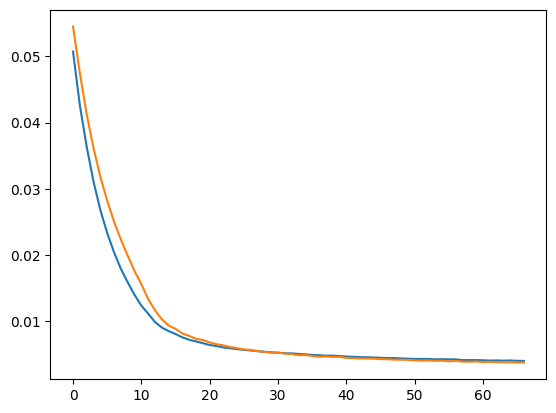

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])